In [1]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.naive_bayes import MultinomialNB

from src.data_prep import y_train, y_test, tf_idf_data_train, tf_idf_data_test
from src.visualizations import evaluate_model, confusion_matrix_heat_map

/Users/stevedye/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/stevedye/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [2]:
pipe = Pipeline([
    ('smote', SMOTE(random_state=0)),
    ('nb', MultinomialNB())])

In [3]:
parameters = {'nb__alpha': [1]}

In [4]:
nb_classifier = GridSearchCV(pipe, parameters, cv=3, n_jobs= -1)
nb_classifier.fit(tf_idf_data_train, y_train)
print(nb_classifier.best_estimator_)

Pipeline(memory=None,
         steps=[('smote',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=0, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('nb',
                 MultinomialNB(alpha=1, class_prior=None, fit_prior=True))],
         verbose=False)


In [5]:
evaluate_model(tf_idf_data_train, y_train, tf_idf_data_test, y_test, nb_classifier)

Training Score:0.825621570354312
Cross V Score: 0.5858680429925616 +/- 0.005786947177055668
Testing Score: 0.5813858971753708
Cross & Test Diff: 0.0044821458171907524
Standard Deviations Away: 0.7745268239118811
[[ 836  216  259]
 [ 606  989  552]
 [ 216  211 1036]]


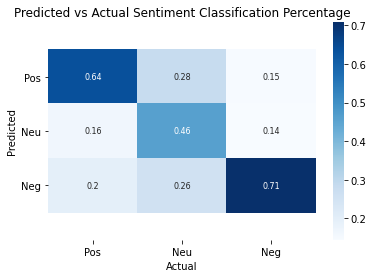

In [6]:
confusion_matrix_heat_map(nb_classifier, tf_idf_data_test, y_test)